In [1]:
import numpy as np 
import keras 
from keras import backend as K 
from keras.models import Sequential 
from keras.layers import Activation 
from keras.layers.core import Dense, Flatten 
from keras.optimizers import Adam 
from keras.metrics import categorical_crossentropy 
from keras.preprocessing.image import ImageDataGenerator 
from keras.layers. normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix 
import itertools 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_path='train'
test_path='test'
valid_path='valid'

In [3]:
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(250,250),classes=['dogs','cats'],batch_size=20)
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(250,250),classes=['dogs','cats'],batch_size=20)
valid_batches=ImageDataGenerator().flow_from_directory(valid_path,target_size=(250,250),classes=['dogs','cats'],batch_size=10)

Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [4]:
imgs,lables=next(train_batches)

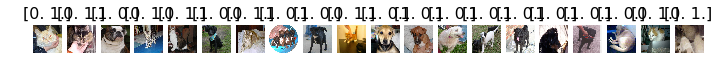

In [5]:
plots(imgs,titles=lables)

In [6]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(250,250,3)),
    Flatten(),
    Dense(2,activation='softmax'),
])  

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 248, 248, 32)      896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1968128)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 3936258   
Total params: 3,937,154
Trainable params: 3,937,154
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit_generator(train_batches,steps_per_epoch=5,validation_data=valid_batches,validation_steps=5,epochs=10,verbose=2)

Epoch 1/10
 - 7s - loss: 8.1535 - acc: 0.4900 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/10
 - 6s - loss: 7.8979 - acc: 0.5100 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/10
 - 6s - loss: 6.1249 - acc: 0.6200 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/10
 - 6s - loss: 9.9932 - acc: 0.3800 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/10
 - 5s - loss: 7.8979 - acc: 0.5100 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/10
 - 5s - loss: 8.2202 - acc: 0.4900 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/10
 - 5s - loss: 7.5755 - acc: 0.5300 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 8/10
 - 5s - loss: 8.5426 - acc: 0.4700 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 9/10
 - 5s - loss: 7.8979 - acc: 0.5100 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 10/10
 - 5s - loss: 8.2202 - acc: 0.4900 - val_loss: 8.0590 - val_acc: 0.5000


In [10]:
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(250,250),classes=['dogs','cats'],batch_size=25)
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(250,250),classes=['dogs','cats'],batch_size=25)
valid_batches=ImageDataGenerator().flow_from_directory(valid_path,target_size=(250,250),classes=['dogs','cats'],batch_size=12)

Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [11]:
model.fit_generator(train_batches,steps_per_epoch=4,validation_data=valid_batches,validation_steps=4,epochs=10,verbose=2)

Epoch 1/10
 - 5s - loss: 7.7367 - acc: 0.5200 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/10
 - 6s - loss: 8.3814 - acc: 0.4800 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/10
 - 6s - loss: 7.8979 - acc: 0.5100 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/10
 - 5s - loss: 8.2202 - acc: 0.4900 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/10
 - 5s - loss: 8.5426 - acc: 0.4700 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/10
 - 5s - loss: 7.5755 - acc: 0.5300 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/10
 - 5s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 8/10
 - 5s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 9/10
 - 5s - loss: 7.7367 - acc: 0.5200 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 10/10
 - 5s - loss: 8.3814 - acc: 0.4800 - val_loss: 8.0590 - val_acc: 0.5000
